In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
file = open('gobletoffire.txt', 'r')
text = file.read()
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)
print(words[:100])

['Harry', 'Potter', 'and', 'the', 'Goblet', 'of', 'Fire', 'by', 'J', 'K', 'Rowling', 'THIS', 'E', 'TEXT', 'WAS', 'NOT', 'PRODUCED', 'FOR', 'PROFIT', 'AND', 'IS', 'NOT', 'FOR', 'SALE', 'we', 'all', 'know', 'this', 'is', 'a', 'copyright', 'protected', 'book', 'blah', 'blah', 'blah', 'no', 'reproduction', 'by', 'any', 'means', 'blah', 'blah', 'blah', 'enjoy', 'To', 'Peter', 'Rowling', 'In', 'Memory', 'of', 'Mr', 'Ridley', 'And', 'to', 'Susan', 'Sladden', 'Who', 'Helped', 'Harry', 'Out', 'of', 'His', 'Cupboard', 'CONTENTS', 'ONE', 'The', 'Riddle', 'House', '1', 'TWO', 'The', 'Scar', '16', 'THREE', 'The', 'Invitation', '26', 'FOUR', 'Back', 'to', 'the', 'Burrow', '39', 'FIVE', 'Weasleys', 'Wizard', 'Wheezes', '51', 'SIX', 'The', 'Portkey', '65', 'SEVEN', 'Bagman', 'and', 'Crouch', '75', 'EIGHT', 'The']


In [13]:
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w.lower() in stop_words]
print(words[500:800])

['villagers', 'exchanged', 'dark', 'looks', 'always', 'thought', 'nasty', 'look', 'right', 'enough', 'grunted', 'man', 'bar', 'War', 'turned', 'funny', 'ask', 'said', 'landlord', 'Told', 'like', 'get', 'wrong', 'side', 'Frank', 'Dot', 'said', 'excited', 'woman', 'corner', 'Horrible', 'temper', 'said', 'Dot', 'nodding', 'fervently', 'remember', 'kid', 'following', 'morning', 'hardly', 'anyone', 'Little', 'Hangleton', 'doubted', 'Frank', 'Bryce', 'killed', 'Riddles', 'neighboring', 'town', 'Great', 'Hangleton', 'dark', 'dingy', 'police', 'station', 'Frank', 'stubbornly', 'repeating', 'innocent', 'person', 'seen', 'near', 'house', 'day', 'Riddles', 'deaths', 'teenage', 'boy', 'stranger', 'dark', 'haired', 'pale', 'Nobody', 'else', 'village', 'seen', 'boy', 'police', 'quite', 'sure', 'Frank', 'invented', 'things', 'looking', 'serious', 'Frank', 'report', 'Riddles', 'bodies', 'came', 'back', 'changed', 'everything', 'police', 'never', 'read', 'odder', 'report', 'team', 'doctors', 'examined'

In [21]:
positive = []
negative = []
sid = SentimentIntensityAnalyzer()
for word in words:
    #print(word)
    ss = sid.polarity_scores(word)
    #print(ss['compound'])
    if(ss['compound'] < -0.1):
        negative.append(word)
    elif(ss['compound'] > 0.1):
        positive.append(word)
print(len(words))
print(positive[:100])
print(negative[:100])
positive = set(positive)
negative = set(negative)

101838
['PROFIT', 'protected', 'enjoy', 'Champions', 'Scoop', 'Dream', 'fine', 'easily', 'grandest', 'agreed', 'liked', 'sure', 'truth', 'fine', 'well', 'impressive', 'excitement', 'pretending', 'rich', 'cared', 'healthy', 'natural', 'rewarded', 'great', 'eagerly', 'like', 'sure', 'likes', 'funny', 'like', 'excited', 'Great', 'innocent', 'sure', 'determined', 'surprise', 'care', 'feeling', 'wealthy', 'clear', 'wealthy', 'fine', 'devotion', 'amused', 'like', 'ease', 'allow', 'reached', 'reached', 'blessing', 'surprised', 'better', 'good', 'comfortable', 'vigorously', 'Forgive', 'security', 'clear', 'determined', 'Certainly', 'determined', 'effectively', 'true', 'relieved', 'well', 'protected', 'wish', 'devotion', 'devotion', 'stronger', 'stronger', 'care', 'effective', 'courage', 'courage', 'wish', 'wish', 'clear', 'faithful', 'faithful', 'loyalty', 'fulfill', 'definitely', 'true', 'amused', 'brilliance', 'truth', 'useful', 'useful', 'amusement', 'reward', 'allow', 'surprise', 'promise'

Positive words


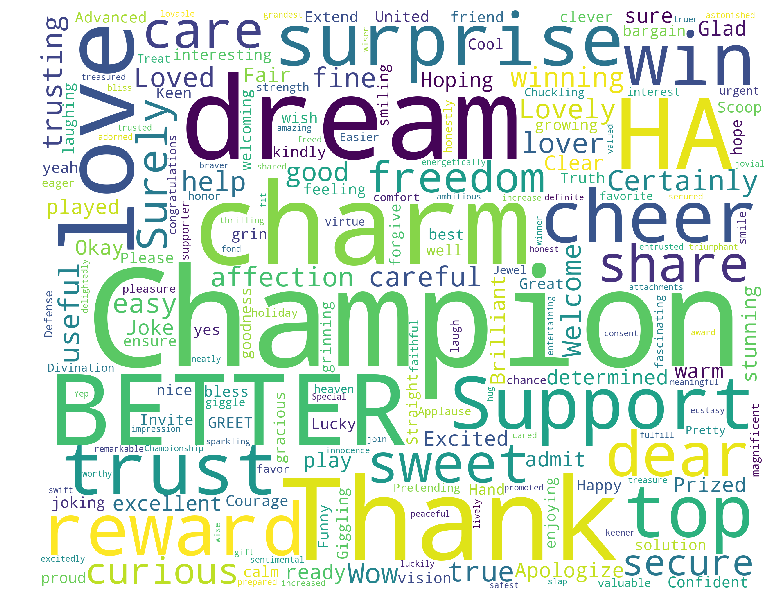

In [19]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(positive,'white')


Negative words


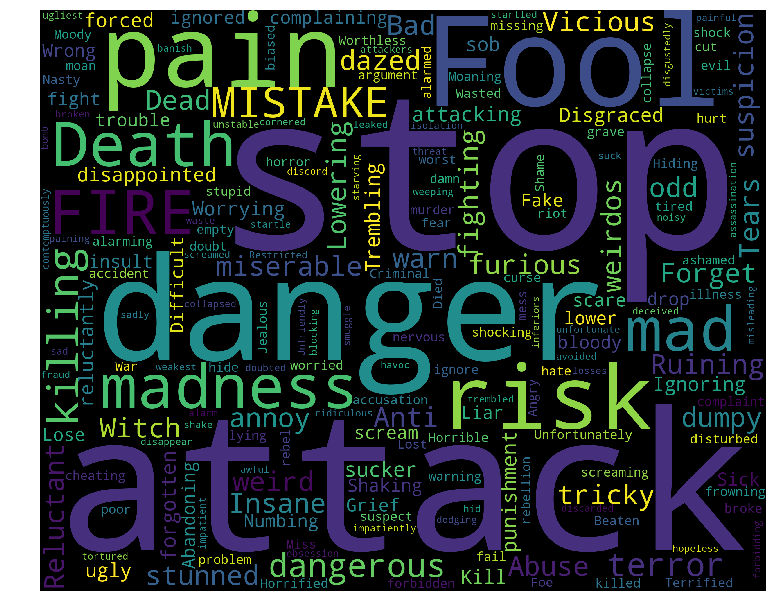

In [22]:
print("Negative words")
wordcloud_draw(negative)